In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML Project/Dataset/final_dataset (1).csv")

In [ ]:
df

,Unnamed: 0,Open1,Open2,Open3,Open4,Open5,High1,High2,High3,High4,...,Neutral4,Neutral5,Negative1,Negative2,Negative3,Negative4,Negative5,High,Low,Close
0,0,79.382858,79.167145,79.637146,80.545715,81.157143,79.575714,80.182854,80.012856,80.629997,...,0,0,6,0,0,0,0,79.099998,77.204285,77.282860
1,1,78.980003,79.382858,79.167145,79.637146,80.545715,79.099998,79.575714,80.182854,80.012856,...,0,0,7,6,0,0,0,78.114288,76.228569,77.704285
2,2,76.778572,78.980003,79.382858,79.167145,79.637146,78.114288,79.099998,79.575714,80.182854,...,0,0,4,7,6,0,0,77.994286,76.845711,77.148575
3,3,77.760002,76.778572,78.980003,79.382858,79.167145,77.994286,78.114288,79.099998,79.575714,...,12,0,5,4,7,6,0,77.937141,76.955711,77.637146
4,4,76.972855,77.760002,76.778572,78.980003,79.382858,77.937141,77.994286,78.114288,79.099998,...,6,12,0,5,4,7,6,78.122856,76.478569,76.645714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,503,107.010002,108.580002,106.959999,107.589996,109.000000,107.029999,108.699997,109.430000,107.690002,...,16,5,3,5,2,1,5,105.370003,102.000000,105.349998
504,504,102.610001,107.010002,108.580002,106.959999,107.589996,105.370003,107.029999,108.699997,109.430000,...,14,16,0,3,5,2,1,105.849998,102.410004,102.709999
505,505,105.750000,102.610001,107.010002,108.580002,106.959999,105.849998,105.370003,107.029999,108.699997,...,14,14,0,0,3,5,2,102.370003,99.870003,100.699997
506,506,100.559998,105.750000,102.610001,107.010002,108.580002,102.370003,105.849998,105.370003,107.029999,...,13,14,0,0,0,3,5,100.129997,96.430000,96.449997


In [ ]:
df.columns

Index(['Unnamed: 0', 'Open1', 'Open2', 'Open3', 'Open4', 'Open5', 'High1',
       'High2', 'High3', 'High4', 'High5', 'Low1', 'Low2', 'Low3', 'Low4',
       'Low5', 'Close1', 'Close2', 'Close3', 'Close4', 'Close5', 'Adj Close1',
       'Adj Close2', 'Adj Close3', 'Adj Close4', 'Adj Close5', 'Volume1',
       'Volume2', 'Volume3', 'Volume4', 'Volume5', 'Positive1', 'Positive2',
       'Positive3', 'Positive4', 'Positive5', 'Neutral1', 'Neutral2',
       'Neutral3', 'Neutral4', 'Neutral5', 'Negative1', 'Negative2',
       'Negative3', 'Negative4', 'Negative5', 'High', 'Low', 'Close'],
      dtype='object')

In [ ]:
X = np.array(df.drop(['High', 'Low', 'Close', 'Unnamed: 0'],1))

<ipython-input-66-beed9b39cb15>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['High', 'Low', 'Close', 'Unnamed: 0'],1))


In [ ]:
X.shape

(508, 45)

In [ ]:
Y = np.array(df['High'])
Y.shape

(508,)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
cut = int(len(X)*0.7)

x_train = X[:cut,:]
x_test = X[cut:,:]
y_train = Y[:cut]
y_test = Y[cut:]

x_train.shape

(355, 45)

In [ ]:
svr = SVR( kernel='rbf', C=1e3, gamma=0.1)
# Train the model 
svr.fit(x_train, y_train)

SVR(C=1000.0, gamma=0.1)

In [ ]:
# svm_confidence = svr.score(x_test, y_test)
# print('svm confidence: ', svm_confidence)

In [ ]:
svm_prediction = svr.predict(x_test)
print(svm_prediction)

[127.84746959 128.15059803 127.60023548 127.23153908 126.7586771
 125.41036701 123.85291748 121.22792919 127.02471379 128.43143331
 130.29233577 132.08295323 131.86619606 130.22941433 126.13515313
 124.38648026 126.76269628 119.77704189 116.98516656 117.01957212
 119.03894024 120.83233647 123.23203045 123.37648004 121.89469996
 121.60265221 118.98384893 118.66212365 122.53848903 119.66532674
 125.73494499 128.32096364 129.45449145 129.86501309 111.46362383
 105.47481292 104.47153831 104.46129605 104.55561701 108.69601604
 125.85838741 121.99539732 120.12077391 120.81553524 110.71365149
 107.60291105 107.28987751 107.85283685 108.32077224 111.01704299
 115.6188814  114.74035435 111.95475615 113.41736072 113.66019905
 115.31495934 117.8267083  109.08366368 103.61632823 102.89494249
 102.94797383 103.00238281 103.5021504  108.38967787 109.47900348
 110.79458267 109.50452209 106.73876054 106.56011337 104.38582395
 103.24833568 103.27591118 105.47125243 106.94808148 116.97268907
 114.290083

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, svm_prediction, squared=False)

7.122357350475982

In [ ]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
              'gamma': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 196 candidates, totalling 980 fits
[CV 1/5] END C=0.001, gamma=100, kernel=linear;, score=-141.087 total time=   0.0s
[CV 2/5] END C=0.001, gamma=100, kernel=linear;, score=-3.075 total time=   0.0s
[CV 3/5] END .C=0.001, gamma=100, kernel=linear;, score=0.431 total time=   0.0s
[CV 4/5] END C=0.001, gamma=100, kernel=linear;, score=-5.340 total time=   0.0s
[CV 5/5] END C=0.001, gamma=100, kernel=linear;, score=-93.682 total time=   0.0s
[CV 1/5] END C=0.001, gamma=100, kernel=poly;, score=-2212.881 total time=   0.2s
[CV 2/5] END .C=0.001, gamma=100, kernel=poly;, score=-78.080 total time=   0.2s
[CV 3/5] END .C=0.001, gamma=100, kernel=poly;, score=-24.030 total time=   0.3s
[CV 4/5] END .C=0.001, gamma=100, kernel=poly;, score=-16.120 total time=   0.2s
[CV 5/5] END C=0.001, gamma=100, kernel=poly;, score=-118.790 total time=   0.1s
[CV 1/5] END .C=0.001, gamma=100, kernel=rbf;, score=-290.173 total time=   0.0s
[CV 2/5] END ...C=0.001, gamma=100, kernel

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [ ]:
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 100, 'kernel': 'linear'}
SVR(C=10, gamma=100, kernel='linear')


In [ ]:
grid_predictions = grid.predict(x_test)
  
mean_squared_error(y_test, grid_predictions, squared=False)

1.5388069100684671

In [102]:
grid_predictions[:3]

array([130.65912992, 131.4833453 , 130.57476213])

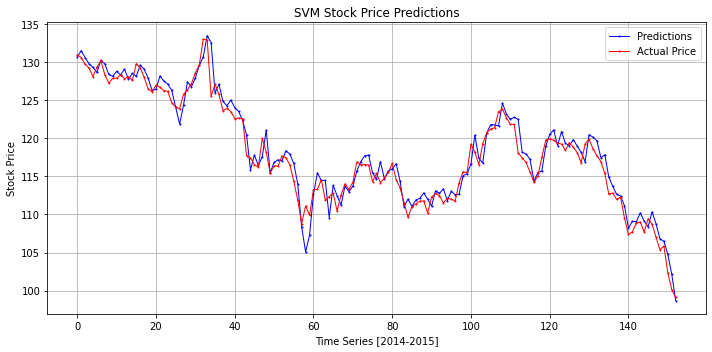

In [99]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [10.00, 5.00]
plt.rcParams["figure.autolayout"] = True

# plt.xlim(xlim[0], xlim[1])
# plt.ylim(ylim[0], ylim[1])
plt.grid()

plt.plot(grid_predictions, marker="o", markersize=1, color="blue", linewidth=1, markeredgecolor="blue", label = 'Predictions' )
plt.plot(y_test, marker="o", markersize=1, color="red", linewidth=1, markeredgecolor="red", label = 'Actual Price' )
plt.title('SVM Stock Price Predictions')
plt.ylabel('Stock Price')
plt.xlabel('Time Series [2014-2015]')
plt.legend()
plt.show()